In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Reading Local CSV file downloaded from kaggle**

In [20]:
df = pd.read_csv("/content/Mobiles Dataset (2025).csv")

o**	What are the most and least expensive mobile phones in each country?**

In [17]:
price_columns = ['Launched_Price_China','Launched_Price_USA','Launched_Price_Dubai','Launched_Price_Pakistan','Launched_Price_India']
most_expensive=df.loc[df[price_columns].idxmax()]
least_expensive=df.loc[df[price_columns].idxmin()]

print("Most Expensive Mobile Phones:")
print(most_expensive)

print("\nLeast Expensive Mobile Phones:")
print(least_expensive)

Most Expensive Mobile Phones:
    Company_Name            Model_Name  Mobile_Weight  RAM  Front_Camera  \
630       Huawei               Mate X2            295    8          16.0   
5          Apple  iPhone 16 Plus 512GB            203    6          12.0   
661       Huawei         Mate XT 512GB            245   12          13.0   
927      Samsung  Galaxy Z Fold6 256GB            239   12          10.0   
6          Apple   iPhone 16 Pro 128GB            206    6          12.0   

     Back_Camera  secondery_C  third_Cm           Processor  Battery_Capacity  \
630           50          NaN       NaN       Kirin 9000 5G              4500   
5             48          NaN       NaN          A17 Bionic              4200   
661           50         12.0      48.0          Kirin 9010              5000   
927           50          NaN       NaN  Snapdragon 8 Gen 3              4400   
6             50         12.0       NaN             A17 Pro              4400   

     Screen_Size  Launched

## o	**How do prices vary across different countries for the same model?**

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'RAM', 'Front_Camera',
       'Back_Camera', 'secondery_C', 'third_Cm', 'Processor',
       'Battery_Capacity', 'Screen_Size', 'Launched_Price_China',
       'Launched_Price_USA', 'Launched_Price_Dubai', 'Launched_Year',
       'Launched_Price_Pakistan', 'Launched_Price_India'],
      dtype='object')


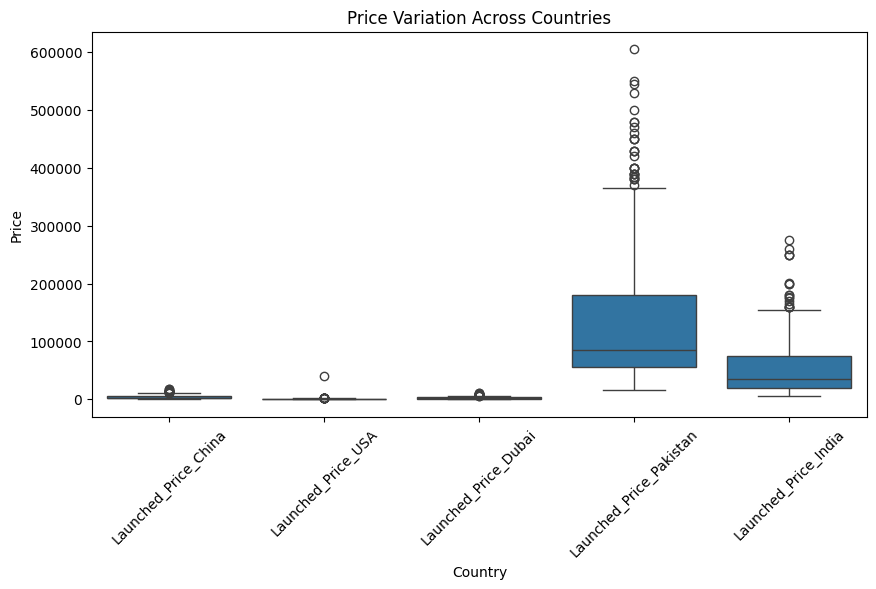

In [32]:
df[price_columns] = df[price_columns].apply(pd.to_numeric) #converting to number from string

print(df.columns)
#plot price variation

df_melted = df.melt(id_vars='Model_Name', value_vars=price_columns, var_name='Country', value_name='Price')

plt.figure(figsize=(10,5))

sns.boxplot(x='Country', y='Price', data=df_melted)
plt.xticks(rotation=45)
plt.title('Price Variation Across Countries')
plt.xlabel('Country')
plt.ylabel('Price')
plt.show()



. **Average Battery Capacity for Phones Launched in Different Years**

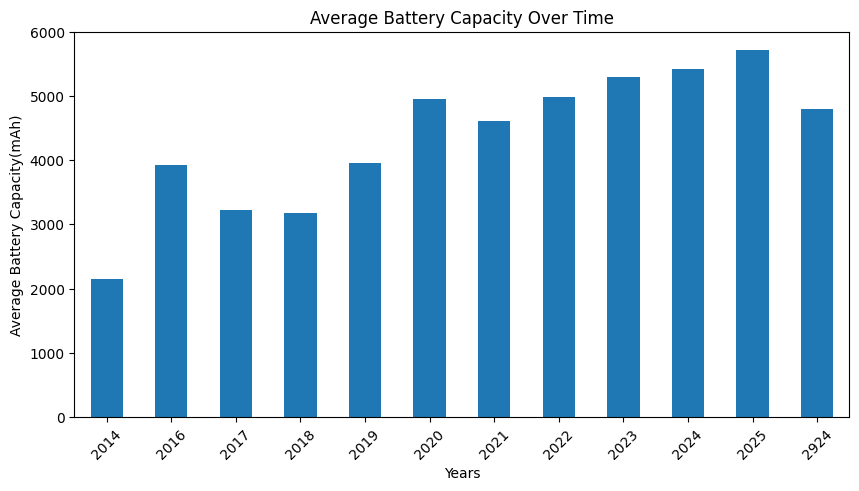

In [41]:
battery_trend = df.groupby('Launched_Year')['Battery_Capacity'].mean()
battery_trend.plot(kind='bar', figsize=(10,5))
plt.title('Average Battery Capacity Over Time')
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Average Battery Capacity(mAh)')
plt.show()

**Trend in RAM Size Over the Years**

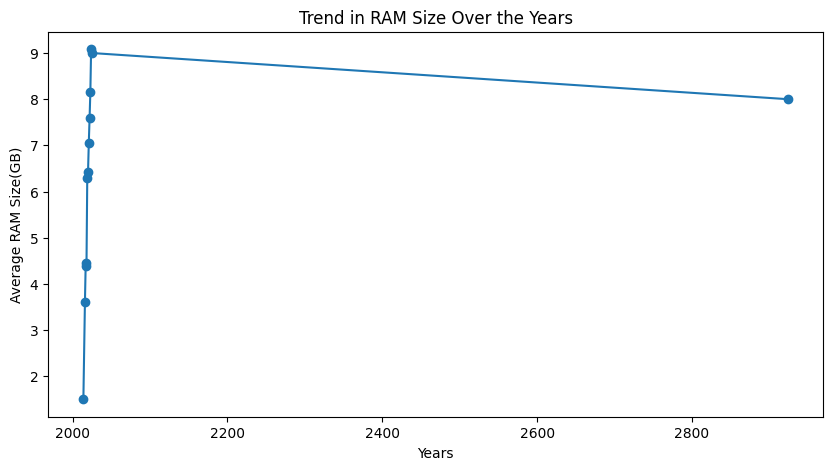

In [47]:
ram_trend = df.groupby('Launched_Year')['RAM'].mean()
ram_trend.plot(kind='line', marker='o',figsize=(10,5))
plt.title('Trend in RAM Size Over the Years')
plt.xlabel('Years')
plt.ylabel('Average RAM Size(GB)')
plt.show()

**Which Brand Has the Most Expensive Flagship Phone?**

In [51]:
flagship_phone = df.loc[df['Launched_Price_USA'].idxmax()]
most_expensive_brand = flagship_phone['Company_Name']
print(f"The brand with the most expensive flagship phone in USA is: {most_expensive_brand}")

flagship_phone = df.loc[df['Launched_Price_India'].idxmax()]
most_expensive_brand = flagship_phone['Company_Name']
print(f"The brand with the most expensive flagship phone in India is: {most_expensive_brand}")

flagship_phone = df.loc[df['Launched_Price_China'].idxmax()]
most_expensive_brand = flagship_phone['Company_Name']
print(f"The brand with the most expensive flagship phone in China is: {most_expensive_brand}")

flagship_phone = df.loc[df['Launched_Price_Pakistan'].idxmax()]
most_expensive_brand = flagship_phone['Company_Name']
print(f"The brand with the most expensive flagship phone in Pakistan is: {most_expensive_brand}")

flagship_phone = df.loc[df['Launched_Price_Dubai'].idxmax()]
most_expensive_brand = flagship_phone['Company_Name']
print(f"The brand with the most expensive flagship phone in Dubai is: {most_expensive_brand}")

The brand with the most expensive flagship phone in USA is: Nokia
The brand with the most expensive flagship phone in India is: Huawei
The brand with the most expensive flagship phone in China is: Huawei
The brand with the most expensive flagship phone in Pakistan is: Samsung
The brand with the most expensive flagship phone in Dubai is: Huawei


**What is the Most Common Screen Size Among Brands?**

Company_Name
Apple        6.1
Google       6.3
Honor        6.8
Huawei       6.7
Infinix      6.8
Lenovo       6.5
Motorola     6.5
Nokia        6.5
OnePlus      6.7
Oppo         6.7
POCO         6.7
Poco        12.1
Realme       6.6
Samsung      6.6
Sony         6.1
Tecno        6.6
Vivo         6.4
Xiaomi       6.7
iQOO        12.3
Name: Screen_Size, dtype: float64


Text(0, 0.5, 'Screen Size')

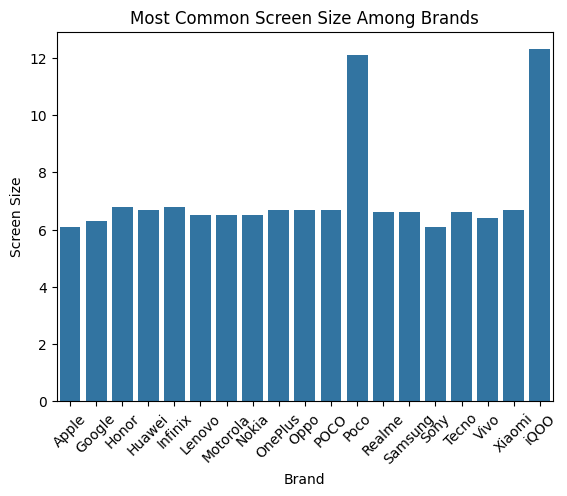

In [57]:
screen_size = df.groupby('Company_Name')['Screen_Size'].apply(lambda x: x.mode().iloc[0])
print(screen_size)

sns.barplot(x=screen_size.index, y=screen_size.values)
plt.title('Most Common Screen Size Among Brands')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Screen Size')

**Correlation Between Battery Capacity and Price**

Correlation between Battery Capacity and Price: 0.06392903276231356


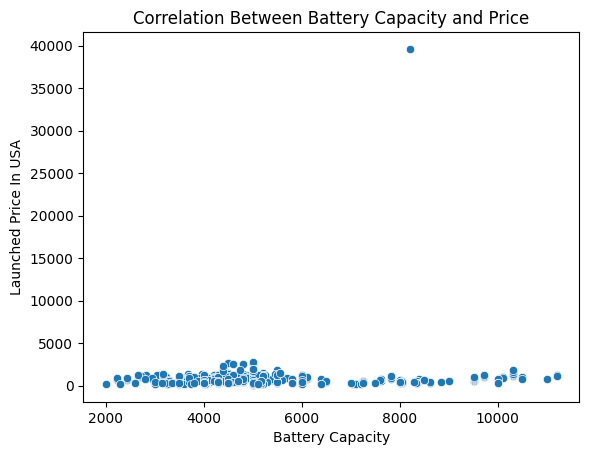

In [65]:
correlation = df['Battery_Capacity'].corr(df['Launched_Price_USA'])
print(f"Correlation between Battery Capacity and Price: {correlation}")

sns.scatterplot(x='Battery_Capacity', y='Launched_Price_USA', data=df)
plt.title('Correlation Between Battery Capacity and Price')
plt.xlabel('Battery Capacity')
plt.ylabel('Launched Price In USA')
plt.show()

**Do Higher RAM and Better Processors Correlate with Higher Prices**

Correlation between RAM and Price: 0.10943470910717021


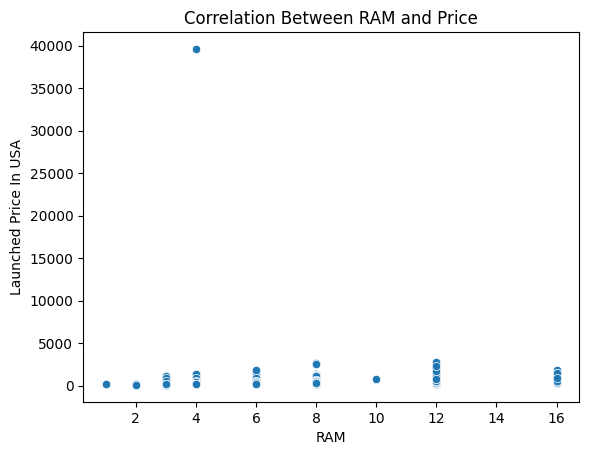

In [67]:
correlation = df['RAM'].corr(df['Launched_Price_USA'])
print(f"Correlation between RAM and Price: {correlation}")

sns.scatterplot(x='RAM', y='Launched_Price_USA', data=df)
plt.title('Correlation Between RAM and Price')
plt.xlabel('RAM')
plt.ylabel('Launched Price In USA')
plt.show()
